# Impractical Jokers

- [Impractical Jokers - wikipedia](https://en.wikipedia.org/wiki/Impractical_Jokers)
- [List of Impractical Jokers episodes - wikipedia](https://en.wikipedia.org/wiki/List_of_Impractical_Jokers_episodes) _(source of data)_

## The Question

### Which of the four - Murr, Sal, Q, or Joe - most frequently are the 'loser' on Impractical Jokers TV show?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data pulled from Wikipedia on 2021-12-30 _(see link above)_ and placed into a gSheet for publishing and usage within this workbook.

In [2]:
%%time
df_orig = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQSHzS8URinSNDW7oSyjAS_GY4YFxTRq3UytcxjTcN3TvZdql_uvaGDRlkYoLw9eFN-zXbiCEv14qFm/pub?output=csv')

CPU times: user 23.4 ms, sys: 3.27 ms, total: 26.6 ms
Wall time: 849 ms


In [3]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Season                   224 non-null    int64 
 1   No. overall              224 non-null    int64 
 2   No. in season            224 non-null    int64 
 3   Title                    224 non-null    object
 4   Original air date        224 non-null    object
 5   Losing Joker(s)          224 non-null    object
 6   U.S. viewers (millions)  224 non-null    object
dtypes: int64(3), object(4)
memory usage: 12.4+ KB


In [4]:
df_orig.head()

,Season,No. overall,No. in season,Title,Original air date,Losing Joker(s),U.S. viewers (millions)
0,1,1,1,"""Pay It Forward""","December 15, 2011",Sal,1.52[1]
1,1,2,2,"""Butterfly Crime Scene""","December 15, 2011",Sal,1.33[1]
2,1,3,3,"""Unmotivational Speaker""","December 22, 2011",Sal,1.50[2]
3,1,4,4,"""Boardwalk of Shame""","December 29, 2011",Joe,1.31[3]
4,1,5,5,"""Drawing a Blank""","January 5, 2012",Sal,1.48[4]


In [5]:
df = df_orig.copy()

# add count row
df['count'] = 1

# Turn the air date into a date object
df['Original air date'] = pd.to_datetime(df['Original air date'])

# Parse out the viewers to exclude the reference (ie, remove the `[x]`)
df['U.S. viewers (millions)'] = df['U.S. viewers (millions)'].str.split('[').str[0]

# # Swap out 'clip show' for 'NA'
# df['Losing Joker(s)'].replace(to_replace='clip show', value=np.nan, inplace=True)

# One-hot encode the losing joker(s)
def losing_jokers(df):
    losers = df['Losing Joker(s)'].lower()
    df['is_murr_loser'] = 1 if 'murr' in losers or 'all jokers' in losers else 0
    df['is_sal_loser'] = 1 if 'sal' in losers or 'all jokers' in losers else 0
    df['is_q_loser'] = 1 if 'q' in losers or 'all jokers' in losers else 0
    df['is_joe_loser'] = 1 if 'joe' in losers or 'all jokers' in losers else 0
    return df

df = df.apply(losing_jokers, axis=1)

# Drop any rows that have more than one loser
df.drop(df[
    df['is_murr_loser'] + df['is_sal_loser'] + df['is_q_loser'] + df['is_joe_loser'] > 1
].index, inplace=True)

# Identify the single 'loser'
df['loser'] = df[[
    'is_murr_loser',
    'is_sal_loser',
    'is_q_loser',
    'is_joe_loser',
]].idxmax(axis=1)


df.head()

,Season,No. overall,No. in season,Title,Original air date,Losing Joker(s),U.S. viewers (millions),count,is_murr_loser,is_sal_loser,is_q_loser,is_joe_loser,loser
0,1,1,1,"""Pay It Forward""",2011-12-15,Sal,1.52,1,0,1,0,0,is_sal_loser
1,1,2,2,"""Butterfly Crime Scene""",2011-12-15,Sal,1.33,1,0,1,0,0,is_sal_loser
2,1,3,3,"""Unmotivational Speaker""",2011-12-22,Sal,1.50,1,0,1,0,0,is_sal_loser
3,1,4,4,"""Boardwalk of Shame""",2011-12-29,Joe,1.31,1,0,0,0,1,is_joe_loser
4,1,5,5,"""Drawing a Blank""",2012-01-05,Sal,1.48,1,0,1,0,0,is_sal_loser


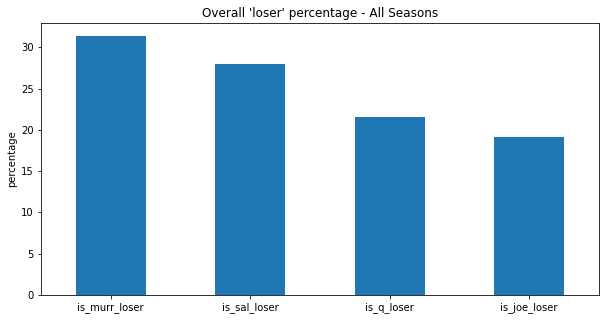

In [6]:
(df['loser'].value_counts(normalize=True).round(4)*100).plot(
    kind='bar',
    title="Overall 'loser' percentage - All Seasons",
    ylabel='percentage',
    rot=0,
    figsize=(10,5),
);

In [7]:
df.groupby(by=[
    'is_murr_loser',
    'is_sal_loser',
    'is_q_loser',
    'is_joe_loser',
]).count()[['Season']]

Season
is_murr_loser is_sal_loser is_q_loser is_joe_loser        
0             0            0          0                  8
                                      1                 39
                           1          0                 44
              1            0          0                 57
1             0            0          0                 56

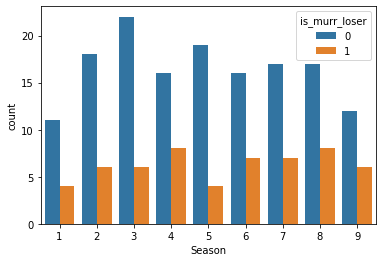

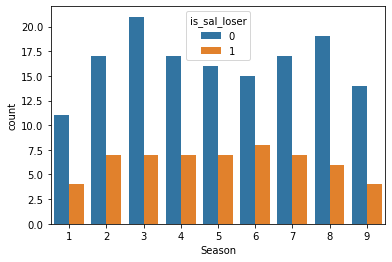

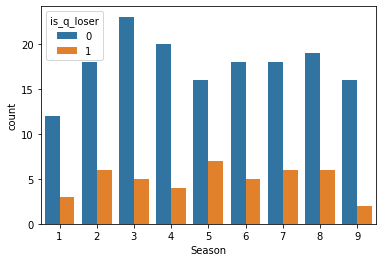

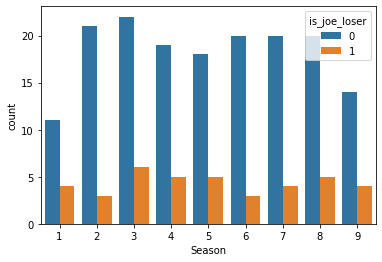

In [8]:
for idx, hue in enumerate([
    'is_murr_loser',
    'is_sal_loser',
    'is_q_loser',
    'is_joe_loser',
]):
    plt.figure(idx)
    sns.countplot(
        data=df,
        x='Season',
        hue=hue
    )

<Figure size 432x288 with 0 Axes>

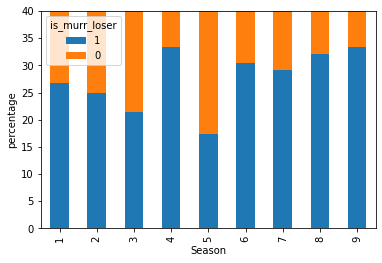

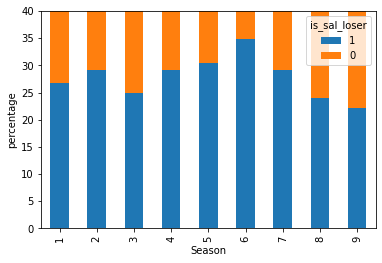

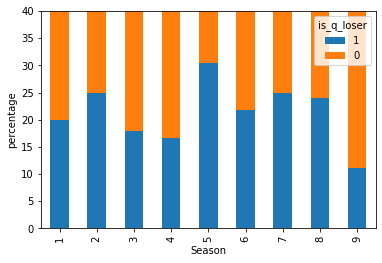

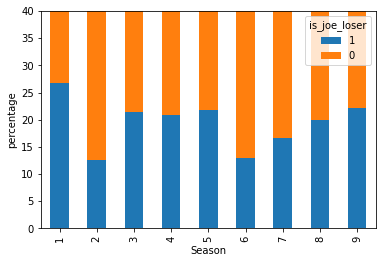

In [9]:
for idx, col in enumerate([
    'is_murr_loser',
    'is_sal_loser',
    'is_q_loser',
    'is_joe_loser',
]):
    plt.figure(idx)
    
    dfl = df[['Season','count', col]].groupby(['Season', col]).count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
    dfl.columns = dfl.columns.droplevel()
    ax = dfl[[1,0]].plot(kind='bar', stacked=True)
    ax.set_ylim(0, 40)
    ax.set_ylabel('percentage')

<AxesSubplot:xlabel='Season', ylabel='count'>

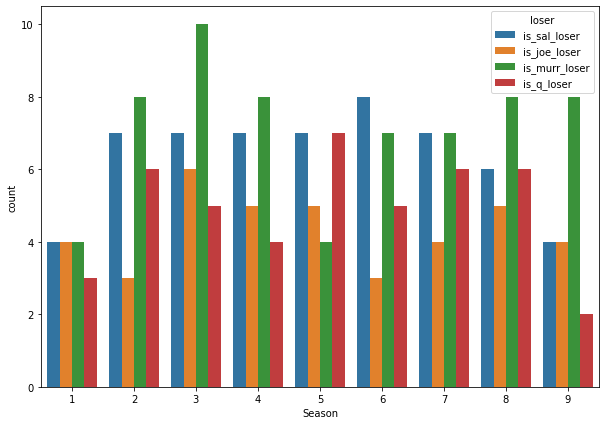

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(
    data=df,
    x='Season',
    hue='loser',
    ax=ax,
)

<AxesSubplot:xlabel='loser', ylabel='count'>

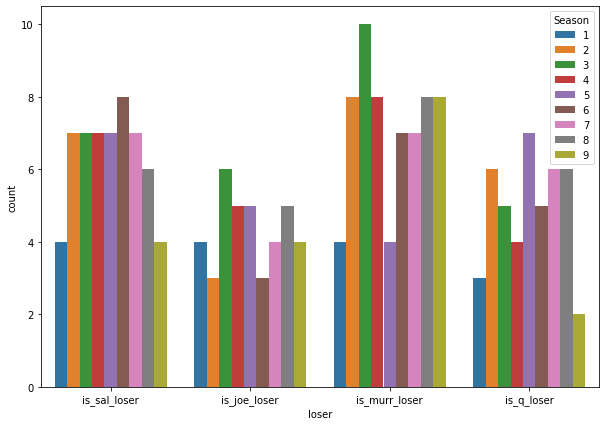

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(
    data=df,
    x='loser',
    hue='Season',
    ax=ax,
)

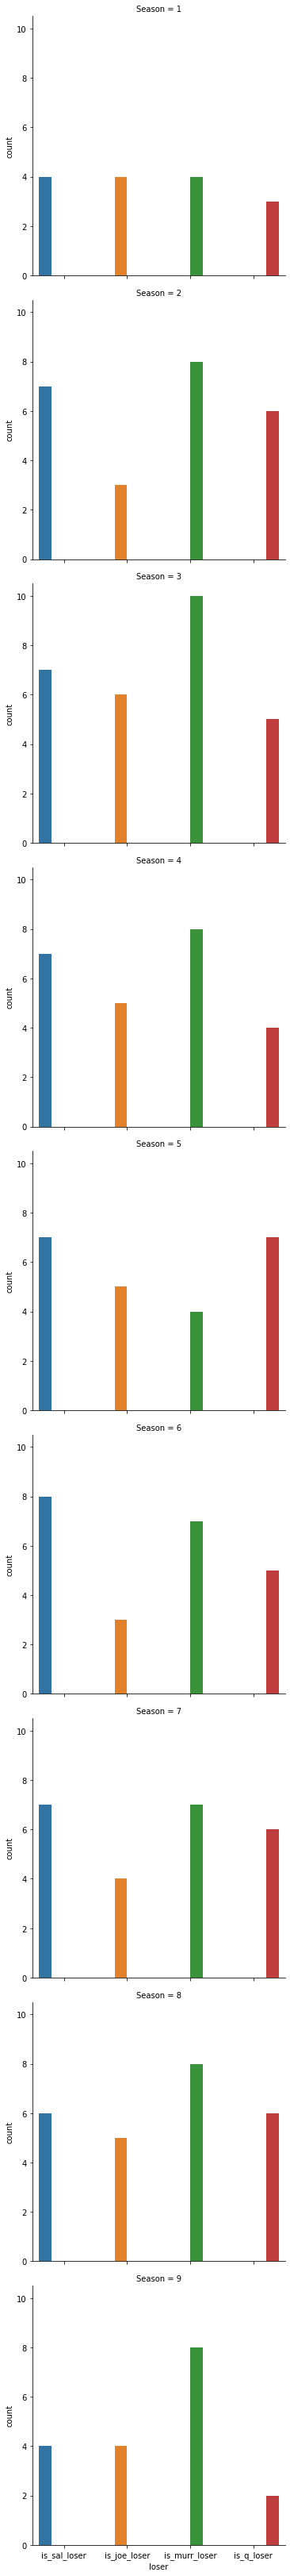

In [12]:
sns.catplot(
    data=df,
    x='loser',
    hue='loser',
    row='Season',
    kind='count',
)

In [13]:
cnt = df[['Season','loser','count']].groupby(['Season','loser']).count()
dfg = cnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dfg.reset_index().head()

,index,Season,loser,count
0,0,1,is_joe_loser,26.666667
1,1,1,is_murr_loser,26.666667
2,2,1,is_q_loser,20.000000
3,3,1,is_sal_loser,26.666667
4,4,2,is_joe_loser,12.500000


<AxesSubplot:xlabel='Season', ylabel='count'>

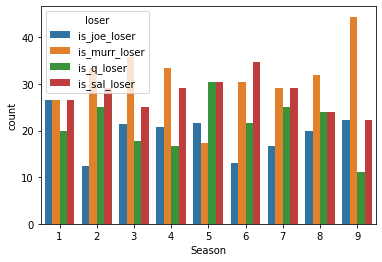

In [14]:
sns.barplot(x='Season', y='count', hue='loser', data=dfg)

In [15]:
cnt = df[['Season','loser','count']].groupby(['Season','loser']).count()
dfg = cnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().reset_index()
dfg.columns = dfg.columns.droplevel()
dfg.index = dfg[''].rename('Season')
del dfg['']
dfg.head(9)

loser,is_joe_loser,is_murr_loser,is_q_loser,is_sal_loser
Season,,,,
1,26.666667,26.666667,20.000000,26.666667
2,12.500000,33.333333,25.000000,29.166667
3,21.428571,35.714286,17.857143,25.000000
4,20.833333,33.333333,16.666667,29.166667
5,21.739130,17.391304,30.434783,30.434783
6,13.043478,30.434783,21.739130,34.782609
7,16.666667,29.166667,25.000000,29.166667
8,20.000000,32.000000,24.000000,24.000000
9,22.222222,44.444444,11.111111,22.222222


<AxesSubplot:xlabel='Season'>

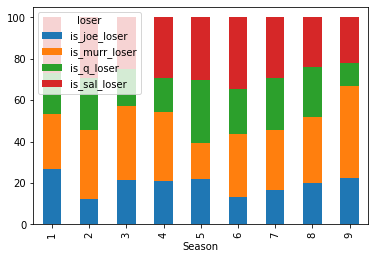

In [16]:
dfg.plot(kind='bar', stacked=True)